# Importing dataset

In [1]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

Using TensorFlow backend.


# Data exposure

In [2]:
print (train_images.shape)
print (len(train_labels))
print ('train_images')
print (train_images[0])
print ('train_labels')
print (train_labels[0])
print ('\n')
print (test_images.shape)
print (len(test_labels))
print ('test_images')
print (test_images[0])
print ('test_labels')
print (test_labels[0])

(60000, 28, 28)
60000
train_images
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0

# Model Create

In [3]:
from keras import models
from keras import layers

network = models.Sequential([
    layers.Dense(512, activation= 'relu', input_shape= (28 * 28,)),
    layers.Dense(10, activation= 'softmax')
])

# network = models.Sequential()
# network.add(layers.Dense(512, activation= 'relu', input_shape= (28 * 28,)))
# network.add(layers.Dense(10, activation= 'softmax'))

network.compile(optimizer= 'rmsprop',
               loss= 'categorical_crossentropy',
               metrics= ['accuracy'])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


# Preparing Data

In [4]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Fit the model

In [21]:
network.fit(train_images, train_labels, epochs= 5, batch_size= 128)

Epoch 1/5
60000/60000 [==============================] - 1s 17us/step - loss: 6.9732e-04 - accuracy: 0.9998
Epoch 2/5
60000/60000 [==============================] - 1s 17us/step - loss: 5.9975e-04 - accuracy: 0.9999
Epoch 3/5
60000/60000 [==============================] - 1s 16us/step - loss: 6.2927e-04 - accuracy: 0.9998
Epoch 4/5
60000/60000 [==============================] - 1s 16us/step - loss: 3.2735e-04 - accuracy: 0.9999
Epoch 5/5
60000/60000 [==============================] - 1s 17us/step - loss: 4.1874e-04 - accuracy: 0.9999


In [6]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print ('test_acc: ', test_acc)

10000/10000 [==============================] - 0s 32us/step
test_acc:  0.9804999828338623


# Display the Result

In [7]:
test_digit = test_images[0].reshape(28,28)
test_digit_label = test_labels[0]

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


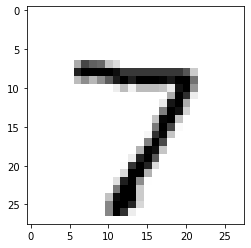

In [8]:
import matplotlib.pyplot as plt
plt.imshow(test_digit, cmap= plt.cm.binary)
plt.show
print (test_digit_label)

In [12]:
# Result
network.predict_classes(test_digit.reshape(1, 28*28))

array([7])

In [14]:
# probability distribution
result = network.predict(test_digit.reshape(1, 28*28))

In [17]:
import numpy as np
result_prob = np.amax(result)
print (result_prob)
result_index = np.argmax(result)
print (result_index)

0.9998932
7
